In [3]:
import pandas as pd
import xlrd as xl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.legend as legend

In [4]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

## 2. 경쟁사 대응


전략적 매장 운영에 내부적 요소만이 고려될 수 있는 점은 아니다. 경쟁사 정보를 활용하여 효과적으로 경쟁사들로 인한 매출하락을 방지할 수 있다.


### 2.1. 경쟁사 거리에 따른 매출

경쟁사의 거리가 매장의 매출에 영향을 주는 지 알아보고자 한다. 
이를 위해 각 매장의 평균월별매출과 가장 가까운 경쟁사의 거리를 상관관계를 통하여 비교한다.

In [5]:
#경쟁사거리와 매출 파일은 Store별로 총평균매출과 경쟁사거리를 원본파일에서 추출하여 1차가공한 파일이다.

SimpleD=pd.read_excel('경쟁사거리와 매출.xlsx')
SimpleD.head()

,Store,Assortment,월별매출,CompetitionDistance
0,1,a,119898.516129,1270
1,2,a,125285.741935,570
2,3,a,174460.032258,14130
3,4,c,243758.290323,620
4,5,a,117510.258065,29910


주변에 가까운 경쟁사가 있을수록 매출이 하락하는 추세와 같은 현상을 보일 것으로 추측하였다.

In [6]:
np.corrcoef(SimpleD["월별매출"], SimpleD["CompetitionDistance"])

array([[1.        , 0.03200163],
       [0.03200163, 1.        ]])

그러나 예상과는 달리 상관관계에 따르면 두 변수의 사이에서 상관관계가 없는 것으로 판단된다.

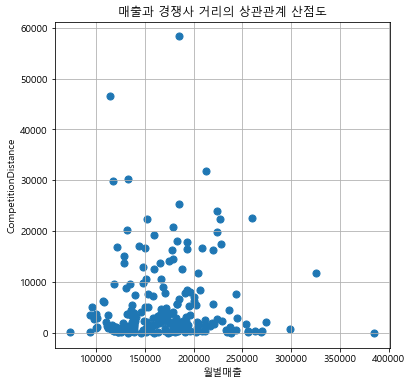

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(SimpleD['월별매출'], SimpleD['CompetitionDistance'], s=50)
plt.xlabel('월별매출')
plt.ylabel('CompetitionDistance')
plt.title("매출과 경쟁사 거리의 상관관계 산점도")
plt.grid()
plt.show()

산점도로 보아도 특별한 규칙을 찾아볼 수 없다.

결론)

    경쟁사 매장과의 거리 차이 자체는 매출에 영향을 주지 않는다.


### 2.2 경쟁사의 신규매장 출현에 따른 매출 분석

데이터 기간동안(2013.01.01~2015.07.31) 경쟁사가 주변에 신규 오픈한 매장만을 추출하여 매출의 변화를 알아보려고 한다. 단순한 경쟁사의 거리보다는 이와 같은 방법이 경쟁사의 신규매장 오픈이 주는 직접적인 영향을 파악할 수 있을 것이다.

In [8]:
#전후차이 파일은 경쟁사가 오픈한 달을 기준으로 매장별 평균 매출을 추출, 차이까지 1차 가공한 데이터 파일이다. 
#데이터 가공 절차가 너무 복잡하여 엑셀로 많은 단계의 가공 처리를 할 수 밖에 없었던 점이 매우 아쉬웠다.

AA=pd.read_excel('전후차이.xlsx')
AA.head()

,Store,전 후 차이
0,5,-1309.666667
1,6,31746.334928
2,7,-34569.666667
3,8,-30581.873016
4,14,-4750.151786


경쟁사의 신규 매장이 오픈한 이후의 평균매출에서 오픈 전 평균 매출을 제하여 차이값을 구하였다. 이를 시각적으로 나타내면,

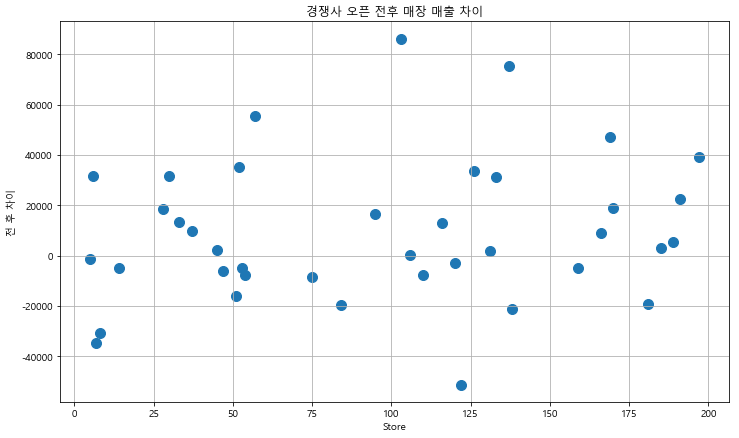

In [9]:
plt.figure(figsize=(12,7))
plt.scatter(AA['Store'], AA['전 후 차이'], s=100)
plt.xlabel('Store')
plt.ylabel('전 후 차이')
plt.title("경쟁사 오픈 전후 매장 매출 차이")
plt.grid()
plt.show()

In [10]:
AA.set_index("Store", inplace=True)

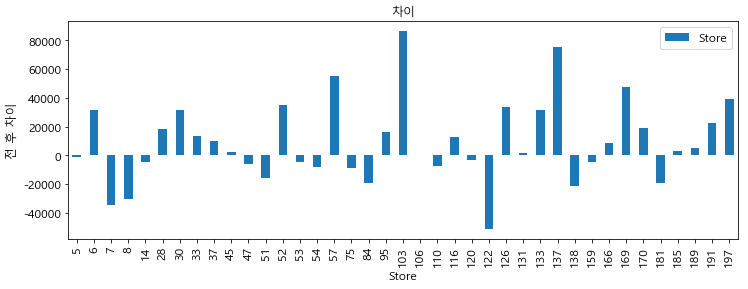

In [11]:
ax = AA.plot(kind='bar', title='차이', figsize=(12, 4), fontsize=12)
ax.set_xlabel('Store', fontsize=12)          # x축 정보 표시
ax.set_ylabel('전 후 차이', fontsize=12)     # y축 정보 표시
ax.legend(['Store'], fontsize=12)
plt.show()

위의 두 그래프가 도출된다. 단순 거리비교와 같이 유의미한 해석을 찾을 수 없다. 



결론)
   
    신규 경쟁사의 등장 자체가 매출에 영향을 주지 않는다. 
    
한계)

    신규 경쟁사의 위치 정보와 지리적 정보가 없어서 이에 대해 더욱 깊게 분석할 수 없었다. 

### 2.3 경쟁사의 신규매장 거리와 Rossmann 매장 타입에 따른 매출 분석

그렇다면 단순히 경쟁사 거리와 신규매장의 등장으로 경쟁사의 영향을 파악하는 것이 아니라, Rossmann 매장의 특성들로 분석한다면
좀 더 유의미한 분석결과를 얻을 수 있을 것으로 추측된다.

데이터 기간동안(2013.01.01~2015.07.31) 경쟁사의 신규 매장이 오픈한 후 Rossmann의 assortment 타입과 경쟁사 거리에 따라 매출이 어떤 추세를 보이는지 알아볼 것이다.

In [12]:
# 데이터 기간동안(2013.01.01~2015.07.31) 경쟁사가 주변에 신규 오픈한 매장정보를 불러온다.
# assortment 타입은 물품구색에 따라 a = 기본형, c = 확장형이다. 
# 중도에 경쟁사가 오픈한 지점들 중 assortment타입이 a인 정보가 Atype, c인 정보가 Ctype이다. 
# 중도경쟁사A와 중도경쟁사C 파일은 필요한 Store206의 항목과 Train206의 항목을 추출하여 1차 가공,
# 이후 중도에 경쟁사가 오픈한 전 후에 따라 평균매출을 엑셀로 2차 가공한 파일이다.

Atype=pd.read_excel('중도경쟁사A.xlsx')
Ctype=pd.read_excel('중도경쟁사C.xlsx')

In [13]:
# a타입 정보를 불러온다. 

Atype

,assortment,Store,오픈 전 매출,오픈 전 개월수,오픈 달 매출,오픈 후 매출,오픈 후 개월수,오픈전 평균매출,오픈후 평균매출,경쟁사거리
0,a,30,1957541,13,136447,2020058,17,150580.076923,118826.941176,40
1,a,133,1307433,7,171622,3578733,23,186776.142857,155597.086957,270
2,a,6,1733507,11,173192,2391059,19,157591.545455,125845.210526,310
3,a,116,586615,3,197031,4927983,27,195538.333333,182517.888889,680
4,a,131,3978846,30,130694,130694,0,132628.200000,130694.000000,920
5,a,169,3515196,18,237850,1776653,12,195288.666667,148054.416667,980
6,a,170,3581425,28,102648,218282,2,127908.035714,109141.000000,1070
7,a,191,1305058,7,158690,2790071,17,186436.857143,164121.823529,1100
8,a,28,2888924,21,119427,1072599,9,137567.809524,119177.666667,1200
9,a,14,1899391,14,145048,2246735,16,135670.785714,140420.937500,1300


데이터 가공에 필요한 항목만 남긴다.

In [14]:
Atype = pd.read_excel('중도경쟁사A.xlsx', header=0, 
                      usecols="H,I,J", convert_float=True)
Atype.head()

,오픈전 평균매출,오픈후 평균매출,경쟁사거리
0,150580.076923,118826.941176,40
1,186776.142857,155597.086957,270
2,157591.545455,125845.210526,310
3,195538.333333,182517.888889,680
4,132628.200000,130694.000000,920


정확한 비교를 위하여 평균매출의 상승률을 구한다.

In [15]:
Atype['상승률']=(Atype['오픈후 평균매출'] - Atype['오픈전 평균매출']) / Atype['오픈전 평균매출']

Atype.head()

,오픈전 평균매출,오픈후 평균매출,경쟁사거리,상승률
0,150580.076923,118826.941176,40,-0.210872
1,186776.142857,155597.086957,270,-0.166933
2,157591.545455,125845.210526,310,-0.201447
3,195538.333333,182517.888889,680,-0.066588
4,132628.200000,130694.000000,920,-0.014584


상승률이 낮을수록 경쟁사가 신규 매장을 오픈할 때 매출하락을 방어하는 데에 있어서 취약함을 뜻한다.

A타입과 C타입의 Store 수가 다르므로 일일히 대조하여 비교할 수가 없다. 그러므로 거리에 따라 4개의 그룹으로 나누어 상승률의 평균을 구하였다.

In [16]:
#경쟁사가 가장 가까운 거리에 있는 6개의 평균 상승률
np.mean(Atype.상승률[0:6])

-0.15038199497346036

In [17]:
#경쟁사가 두번째로 가까운 거리에 있는 6개의 평균 상승률
np.mean(Atype.상승률[6:12])

-0.1219310030386926

In [18]:
#경쟁사가 세번째로 가까운 거리에 있는 6개의 평균 상승률
np.mean(Atype.상승률[12:18])

-0.09400592265884831

In [19]:
#경쟁사가 가장 먼 거리에 있는 5개의 평균 상승률
np.mean(Atype.상승률[18:23])

0.0782317870432673

C타입도 위의 A타입의 데이터처럼 같은 절차로 가공한다.

In [20]:
# C타입 정보를 불러온다. 

Ctype

,assortment,Store,오픈 전 매출,오픈 전 개월수,오픈 달 매출,오픈 후 매출,오픈 후 개월수,오픈전 평균매출,오픈후 평균매출,경쟁사거리
0,c,166,2262495,15,141433,2129265,15,150833.000000,141951.000000,100
1,c,47,527215,3,164466,4910079,27,175738.333333,181854.777778,270
2,c,57,4878326,17,267591,3009716,13,286960.352941,231516.615385,420
3,c,52,2974594,15,163924,1469224,9,198306.266667,163247.111111,450
4,c,33,894649,4,209083,5468426,26,223662.250000,210324.076923,1320
5,c,185,5091087,28,173026,357651,2,181824.535714,178825.500000,1860
6,c,103,2592946,22,112886,253241,8,117861.181818,31655.125000,5210
7,c,54,3752136,19,196648,2258634,11,197480.842105,205330.363636,7170
8,c,51,922745,6,174191,3055092,18,153790.833333,169727.333333,10570
9,c,84,6050494,19,323802,3718426,11,318447.052632,338038.727273,11810


In [21]:
Ctype = pd.read_excel('중도경쟁사C.xlsx', header=0, 
                      usecols="H,I,J", convert_float=True)
Ctype.head()

,오픈전 평균매출,오픈후 평균매출,경쟁사거리
0,150833.000000,141951.000000,100
1,175738.333333,181854.777778,270
2,286960.352941,231516.615385,420
3,198306.266667,163247.111111,450
4,223662.250000,210324.076923,1320


In [22]:
Ctype['상승률']=(Ctype['오픈후 평균매출'] - Ctype['오픈전 평균매출']) / Ctype['오픈전 평균매출']

Ctype.head()

,오픈전 평균매출,오픈후 평균매출,경쟁사거리,상승률
0,150833.000000,141951.000000,100,-0.058886
1,175738.333333,181854.777778,270,0.034804
2,286960.352941,231516.615385,420,-0.193210
3,198306.266667,163247.111111,450,-0.176793
4,223662.250000,210324.076923,1320,-0.059635


In [23]:
#경쟁사가 가장 가까운 거리에 있는 4개의 평균 상승률
np.mean(Ctype.상승률[0:4])

-0.09852136789014818

In [24]:
#경쟁사가 두번째로 가까운 거리에 있는 4개의 평균 상승률
np.mean(Ctype.상승률[4:8])

-0.19195036269791277

In [25]:
#경쟁사가 세번째로 가까운 거리에 있는 4개의 평균 상승률
np.mean(Ctype.상승률[8:12])

0.10064517829705875

In [26]:
#경쟁사가 가장 먼 거리에 있는 4개의 평균 상승률
np.mean(Ctype.상승률[12:16])

0.14838265069691448

위의 절차를 통해 경쟁사 거리를 4개의 등급으로 나누어 A타입과 C타입의 평균 매출상승률을 구하였다. 
이를 하나로 통합하면 다음과 같다.

In [27]:
df1 = pd.DataFrame({'A타입 상승률': ['-0.1503', '-0.1219', '-0.0940', '0.0782'],
                    'C타입 상승률': ['-0.0985', '-0.1919', '0.1006', '0.1483']},
                   index=['가','나','다','라'])
df1

,A타입 상승률,C타입 상승률
가,-0.1503,-0.0985
나,-0.1219,-0.1919
다,-0.0940,0.1006
라,0.0782,0.1483


경쟁사가 가장 가까운 거리에 위치한 매장의 집단은 '가', 두번째로 가가운 거리에 위치한 매장의 집단은 '나', 세번째로 가까운 거리에 위치한 매장의 집단은 '다', 가장 먼 거리에 위치한 매장의 집단은 '라'로 분류하였다. 
이를 상승률과 함께 그래프로 나타내면 다음과 같다.

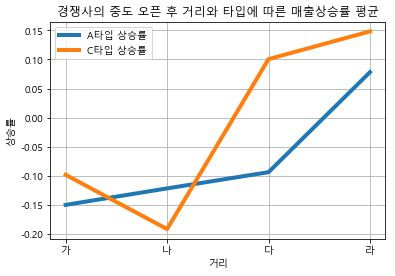

In [28]:
plt.figure()
xs = ["가", "나", "다", "라"]
plt.plot(xs, [-0.1503, -0.1219, -0.0940, 0.0782], lw=4, label = 'A타입 상승률')
plt.plot(xs, [-0.0985, -0.1919, 0.1006, 0.1483], lw=4, label = 'C타입 상승률')
plt.grid()
plt.xlabel('거리') 
plt.ylabel('상승률') 
plt.title('경쟁사의 중도 오픈 후 거리와 타입에 따른 매출상승률 평균')
plt.legend()
plt.show()

경쟁사의 신규 매장이 오픈하면 A타입이 매출하락을 방어하는 데에 있어서 전반적으로 취약하다.

결론) 

    대응책: 경쟁사가 신규 매장을 오픈하였을 때는 A타입보다 C타입의 매장으로 대응해야 한다.

# Ⅲ. 결론

 DataSet에서 추출할 수 있는 요인들을 다양한 방면으로 묶어서 매출과 고객수에 영향을 미치는 관계를 알아보고자 하였다. 지금까지 도출된 결과를 바탕으로 매장 운영 전략을 아래에 정리하고자 한다. 

## 1. 매장 운영 전략

    1. 프로모션 전략

    상시 프로모션(Promo2)에 따른 매출 분석을 통하여 상시 프로모션이 매출 증가에 확실히 긍정적인 역할을 한다는 것을 
    알 수 있었다. 그에 더 나아가, 실질적인 전략을 작성하기 위하여 프로모션을 실시함에 따라 미치는 다른 요인들을 
    도출해내고자 분석을 실시하였다. 전략은 아래와 같다.
    
        1. 매출이 낮은 화요일, 수요일(혹은 목요일)과 일요일 고객도 유인할 수 있는 월요일에 상시 프로모션을 진행하는 것이 가장 효율적이다. 
        2. 공휴일에 프로모션을 진행해야 한다. 그렇지 않으면 프로모션을 한 평일보다 매출이 낮다.


    2. 경쟁사 대응책

    가장 근처에 있는 경쟁사의 거리와 경쟁사의 신규 매장의 출현이라는 가장 큰 요인을 기점으로, Rossmann 매장의 매출 변화를 분석하였다.
    Rossmann의 Assortment 타입이 변수로 유의미한 데이터 결과를 도출하였음으로, 이를 토대로 나온 경쟁사 대응책은 아래와 같다. 
    
        1. 경쟁사의 거리는 매출과 상관이 없다. 가까운 곳에 경쟁사가 있다고 해서 무조건 매출을 걱정할 필요는 없다.
        2. 경쟁사의 신규 매장 출현도 마찬가지이다. 그것 자체로는 영향이 미미하다.
        3. 그러나 경쟁사가 신규 매장을 오픈하였을 때는 A타입보다 C타입의 매장으로 대응하는 것이 매출 상승에 효과적이다.

## 2. 한계점

데이터 분석을 토대로 추측되는 결과물들을 검증할 수 있는 추가적인 데이터가 없어서 아쉬웠다. 또한 Python을 다루는 능력이 부족하여 데이터를 가공하는 데에 어려움을 많이 겪었다. 가지고 있는 Rossmann의 데이터 개체 수가 매우 많아 Python 안에서 다루기가 매우 복잡하여 1차 가공을 대부분 엑셀에서 행해야 했다.  